<a href="https://colab.research.google.com/github/databyhuseyn/DeepLearning/blob/main/autoencoders_gans_and_diffusion_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Performing PCA with an Undercomplete Linear Autoencoder

In [1]:
import tensorflow as tf

tf.random.set_seed(42)

encoder = tf.keras.Sequential([tf.keras.layers.Dense(2)])
decoder = tf.keras.Sequential([tf.keras.layers.Dense(3)])
autoencoder = tf.keras.Sequential([encoder, decoder])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.5)
autoencoder.compile(loss='mse',optimizer=optimizer)

In [2]:
import numpy as np
from scipy.spatial.transform import Rotation

m = 60
X = np.zeros((m, 3))  # initialize 3D dataset
np.random.seed(42)
angles = (np.random.rand(m) ** 3 + 0.5) * 2 * np.pi  # uneven distribution
X[:, 0], X[:, 1] = np.cos(angles), np.sin(angles) * 0.5  # oval
X += 0.28 * np.random.randn(m, 3)  # add more noise
X = Rotation.from_rotvec([np.pi / 29, -np.pi / 20, np.pi / 4]).apply(X)
X_train = X + [0.2, 0, 0.2]  # shift a bit

In [3]:
history = autoencoder.fit(X_train, X_train, epochs=500, verbose=False)
coding = encoder.predict(X_train)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


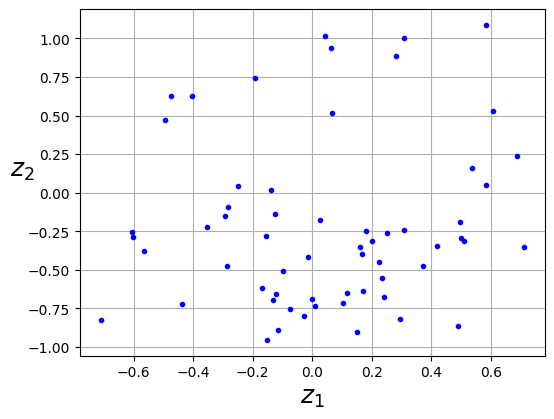

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 4.5))
plt.plot(coding[:,0], coding[:, 1], 'b.')
plt.xlabel('$z_1$', fontsize=18)
plt.ylabel('$z_2$', fontsize=18, rotation=0)
plt.grid(True)
plt.show()

# Stacked Autoencoders

# Implementing a Stacked Autoencoder Using Keras

In [5]:
# extra code - loads, scales, and splits the fahsion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
tf.random.set_seed(42)

stacked_encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu')
])

stacked_decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),    # nece getmisense ele de qayit
    tf.keras.layers.Dense(28*28),
    tf.keras.layers.Reshape([28, 28])
])
stacked_ae = tf.keras.Sequential([stacked_encoder, stacked_decoder])

stacked_ae.compile(loss='mse', optimizer='nadam')   # nadam sometimes perform better than adam
history = stacked_ae.fit(X_train, X_train, epochs=20,
                         validation_data=(X_valid, X_valid))

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0349 - val_loss: 0.0179
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0173 - val_loss: 0.0167
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0161 - val_loss: 0.0157
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0153 - val_loss: 0.0151
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0148 - val_loss: 0.0147
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0145 - val_loss: 0.0145
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0142 - val_loss: 0.0142
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0139 - val_loss: 0.0141
Epoch 9/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0138 - val_loss: 0.0141
Epoch 10/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0136 - val_loss: 0.0139
Epoch 11/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0135 - val_loss: 0.0138
Epoch 12/20
1719/1719 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


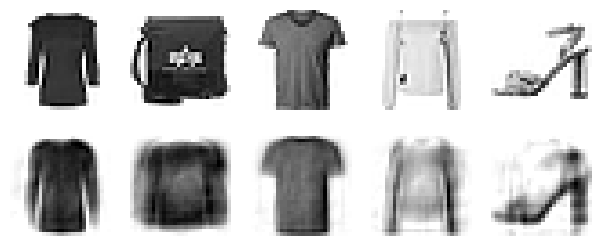

In [7]:
import numpy as np

def plot_reconstructions(model, images=X_valid, n_images=5):
  reconstructions = np.clip(model.predict(images[:n_images]), 0, 1)
  fig = plt.figure(figsize=(n_images * 1.5, 3))
  for image_index in range(n_images):
    plt.subplot(2, n_images, 1+image_index)
    plt.imshow(images[image_index], cmap='binary')
    plt.axis('off')
    plt.subplot(2, n_images, 1 + n_images + image_index)
    plt.imshow(reconstructions[image_index], cmap='binary')
    plt.axis('off')

plot_reconstructions(stacked_ae)
plt.show()

# Visualizing the Fashion MNIST Dataset

In [8]:
from sklearn.manifold import TSNE

X_valid_compressed = stacked_encoder.predict(X_valid) # birinci suretli ama daha az deqiq
tsne = TSNE(init='pca', learning_rate='auto', random_state=42)  # ikinci daha deqiq amma yavash model ishledirik ki, tsne manifold oldugu uchun boyuk datada chox vaxt aparir
X_valid_2D = tsne.fit_transform(X_valid_compressed)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


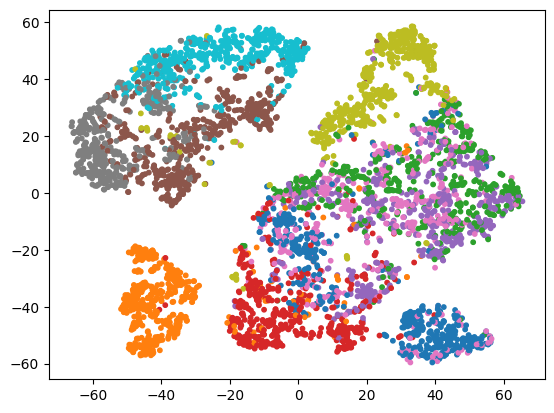

In [9]:
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap='tab10')
plt.show()

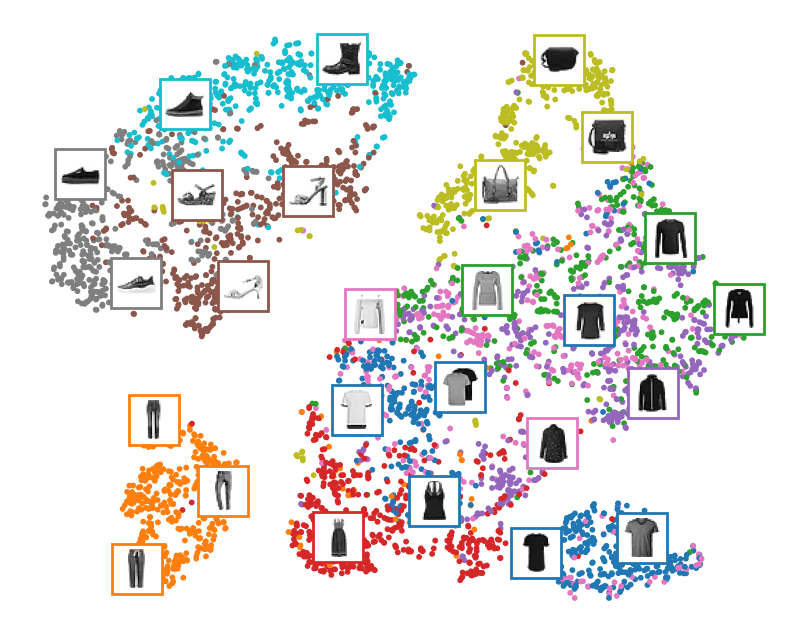

In [10]:
# extra code – beautifies the previous diagram for the book

import matplotlib as mpl

plt.figure(figsize=(10, 8))
cmap = plt.cm.tab10
Z = X_valid_2D
Z = (Z - Z.min()) / (Z.max() - Z.min())  # normalize to the 0-1 range
plt.scatter(Z[:, 0], Z[:, 1], c=y_valid, s=10, cmap=cmap)
image_positions = np.array([[1., 1.]])
for index, position in enumerate(Z):
    dist = ((position - image_positions) ** 2).sum(axis=1)
    if dist.min() > 0.02: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(X_valid[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_valid[index]), "lw": 2})
        plt.gca().add_artist(imagebox)

plt.axis("off")
plt.show()

Tying weights

In [11]:
class DenseTranspose(tf.keras.layers.Layer):
  def __init__(self, dense, activation=None, **kwargs):
    super().__init__(**kwargs)
    self.dense = dense
    self.activation = tf.keras.activations.get(activation)

  def build(self, batch_input_shape):
    self.biases = self.add_weight(name='bias',
                                  shape=(self.dense.weights[0].shape[0], ),
                                  initializer='zeros')
    super().build(batch_input_shape)

  def call(self, inputs):
    Z = tf.matmul(inputs, self.dense.weights[0], transpose_b=True)
    return self.activation(Z + self.biases)

In [12]:
tf.random.set_seed(42)

dense_1 = tf.keras.layers.Dense(100, activation='relu')
dense_2 = tf.keras.layers.Dense(30, activation='relu')

tied_encoder = tf.keras.Sequential([
  tf.keras.layers.Flatten(),
  dense_1,
  dense_2
])

tied_decoder = tf.keras.Sequential([
  DenseTranspose(dense_2, activation='relu'),
  DenseTranspose(dense_1),
  tf.keras.layers.Reshape([28, 28])
])

tied_ae = tf.keras.Sequential([tied_encoder, tied_decoder])

# extra code - compiles and fits the model
tied_ae.compile(loss='mse', optimizer='nadam')
history = tied_ae.fit(X_train, X_train, epochs=10,
                      validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0344 - val_loss: 0.0172
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0165 - val_loss: 0.0154
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0150 - val_loss: 0.0146
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0144 - val_loss: 0.0142
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0140 - val_loss: 0.0139
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0138 - val_loss: 0.0137
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0136 - val_loss: 0.0136
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0134 - val_loss: 0.0135
Epoch 9/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0133 - val_loss: 0.0134
Epoch 10/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0132 - val_loss: 0.0133


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


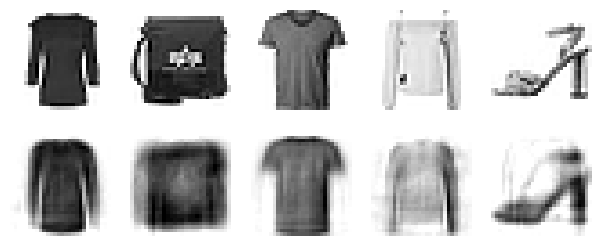

In [13]:
plot_reconstructions(tied_ae)
plt.show()

In the past, there were a lot of problems like computational impotence, vanishing and exploding gradients, so they used to train encoders one by one

In [14]:
def train_autoencoder(n_neurons, X_train, X_valid, n_epochs=10,
                      output_activation=None):
  n_inputs = X_train.shape[-1]
  encoder = tf.keras.layers.Dense(n_neurons, activation='relu')
  decoder = tf.keras.layers.Dense(n_inputs, activation=output_activation)
  autoencoder = tf.keras.Sequential([encoder, decoder])
  autoencoder.compile(loss='mse', optimizer='nadam')
  autoencoder.fit(X_train, X_train, epochs=n_epochs,
                  validation_data=(X_valid, X_valid))
  return encoder, decoder, encoder(X_train), encoder(X_valid)

In [15]:
tf.random.set_seed(42)

X_train_flat = tf.keras.layers.Flatten()(X_train)
X_valid_flat = tf.keras.layers.Flatten()(X_valid)
enc1, dec1, X_train_enc1, X_valid_enc1 = train_autoencoder(
    100, X_train_flat, X_valid_flat)
enc2, dec2, _, _ = train_autoencoder(
    30, X_train_enc1, X_valid_enc1, output_activation='relu')

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0303 - val_loss: 0.0115
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0109 - val_loss: 0.0101
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0100 - val_loss: 0.0097
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0097 - val_loss: 0.0096
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0095 - val_loss: 0.0094
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0093 - val_loss: 0.0092
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0092 - val_loss: 0.0091
Epoch 9/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0091 - val_loss: 0.0090
Epoch 10/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0091 - val_loss: 0.0090
Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1239 - val_loss: 0.0382
Epoch 2/10
1719/1719 ━━━━━━━━━━

In [16]:
stacked_ae_1_by_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    enc1, enc2, dec2, dec1,
    tf.keras.layers.Reshape([28, 28])
])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


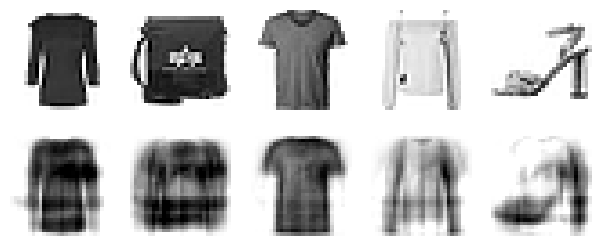

In [17]:
plot_reconstructions(stacked_ae_1_by_1)
plt.show()

In [18]:
stacked_ae_1_by_1.compile(loss='mse', optimizer='nadam')
history = stacked_ae_1_by_1.fit(X_train, X_train, epochs=5,
                                validation_data=(X_valid, X_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0174 - val_loss: 0.0158
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0154 - val_loss: 0.0149
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0144 - val_loss: 0.0143
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0139 - val_loss: 0.0140
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0136 - val_loss: 0.0137


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


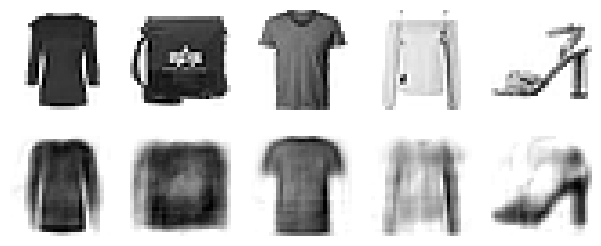

In [19]:
plot_reconstructions(stacked_ae_1_by_1)
plt.show()

# Convolutional Autoencoders

In [20]:
tf.random.set_seed(42)

conv_encoder = tf.keras.Sequential([
    tf.keras.layers.Reshape([28, 28, 1]),
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),  # output: 14 * 14 * 16
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),  # output: 7 * 7 * 32
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),  # output: 3 * 3 * 64
    tf.keras.layers.Conv2D(30, 3, padding='same', activation='relu'),
    tf.keras.layers.GlobalAvgPool2D() # output: 30
])

cov_decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(3 * 3 * 16),
    tf.keras.layers.Reshape((3, 3, 16)),
    tf.keras.layers.Conv2DTranspose(32, 3, strides=2, activation='relu'),
    tf.keras.layers.Conv2DTranspose(16, 3, strides=2, padding='same',
                                    activation='relu'),
    tf.keras.layers.Conv2DTranspose(1, 3, strides=2, padding='same'),
    tf.keras.layers.Reshape([28, 28])
])

conv_ae = tf.keras.Sequential([conv_encoder, cov_decoder])

# extra code - compiles and fits the model
conv_ae.compile(loss='mse', optimizer='nadam')
history = conv_ae.fit(X_train, X_train, epochs=10,
                      validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 0.0467 - val_loss: 0.0216
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - loss: 0.0205 - val_loss: 0.0185
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0178 - val_loss: 0.0169
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0163 - val_loss: 0.0158
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0154 - val_loss: 0.0152
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0147 - val_loss: 0.0146
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0141 - val_loss: 0.0144
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0137 - val_loss: 0.0140
Epoch 9/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0134 - val_loss: 0.0136
Epoch 10/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0131 - val_loss: 0.0131


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 789ms/step


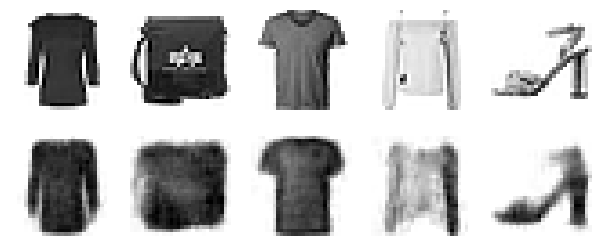

In [21]:
plot_reconstructions(conv_ae)
plt.show()

# Extra Material - Recurrent Autoencoders

In [22]:
tf.random.set_seed(42)

recurrent_encoder = tf.keras.Sequential([
    tf.keras.layers.LSTM(100, return_sequences=True),
    tf.keras.layers.LSTM(30)
])
recurrent_decoder = tf.keras.Sequential([
    tf.keras.layers.RepeatVector(28),
    tf.keras.layers.LSTM(100, return_sequences=True),
    tf.keras.layers.Dense(28)
])

recurrent_ae = tf.keras.Sequential([recurrent_encoder, recurrent_decoder])
recurrent_ae.compile(loss='mse', optimizer='nadam')

In [23]:
history = recurrent_ae.fit(X_train, X_train, epochs=10,
                           validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - loss: 0.0360 - val_loss: 0.0193
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - loss: 0.0183 - val_loss: 0.0162
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 0.0158 - val_loss: 0.0146
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 0.0143 - val_loss: 0.0137
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - loss: 0.0134 - val_loss: 0.0129
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 0.0126 - val_loss: 0.0123
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 0.0120 - val_loss: 0.0118
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 0.0116 - val_loss: 0.0114
Epoch 9/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 0.0112 - val_loss: 0.0110
Epoch 10/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - loss: 0.0109 - val_loss: 0.0107


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


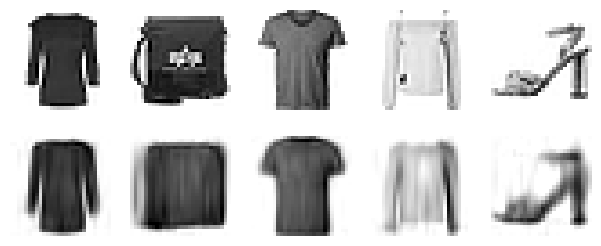

In [24]:
plot_reconstructions(recurrent_ae)
plt.show()

# Denoising Autoencoders

In [25]:
tf.random.set_seed(42)

dropout_encoder = tf.keras.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(30, activation='relu')
])
dropout_decoder = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(28 * 28),
  tf.keras.layers.Reshape([28, 28])
])

dropout_ae = tf.keras.Sequential([dropout_encoder, dropout_decoder])
dropout_ae.compile(loss='mse', optimizer='nadam')

In [26]:
history = dropout_ae.fit(X_train, X_train, epochs=10,
                         validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0391 - val_loss: 0.0218
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0227 - val_loss: 0.0198
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0212 - val_loss: 0.0191
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0204 - val_loss: 0.0184
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0199 - val_loss: 0.0179
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0194 - val_loss: 0.0176
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0191 - val_loss: 0.0172
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0188 - val_loss: 0.0170
Epoch 9/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0186 - val_loss: 0.0169
Epoch 10/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0184 - val_loss: 0.0167


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


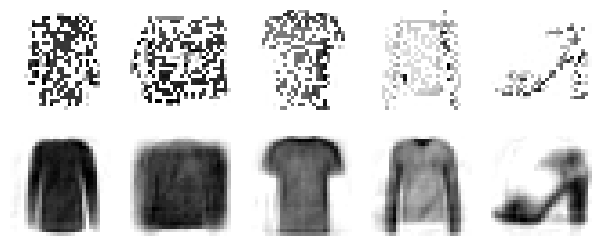

In [27]:
tf.random.set_seed(42)
dropout = tf.keras.layers.Dropout(0.5)
plot_reconstructions(dropout_ae, dropout(X_valid, training=True)) # Monte Carlo dropout would do the same thing, we just dropped some pixels, and required from our model to denoise the original picture
plt.show()

# Sparse Autoencoders

In [28]:
sparse_l1_encoder = tf.keras.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(300, activation='sigmoid'),
  tf.keras.layers.ActivityRegularization(l1=1e-4)
])

sparse_l1_decoder = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(28 * 28),
  tf.keras.layers.Reshape([28, 28])
])

sparse_l1_ae = tf.keras.Sequential([sparse_l1_encoder, sparse_l1_decoder])

sparse_l1_ae.compile(loss='mse', optimizer='nadam')
history = sparse_l1_ae.fit(X_train, X_train, epochs=10,
                           validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0820 - val_loss: 0.0302
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0288 - val_loss: 0.0264
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0255 - val_loss: 0.0241
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0237 - val_loss: 0.0227
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0223 - val_loss: 0.0217
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0213 - val_loss: 0.0208
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0206 - val_loss: 0.0202
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0200 - val_loss: 0.0197
Epoch 9/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0195 - val_loss: 0.0193
Epoch 10/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0191 - val_loss: 0.0190


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


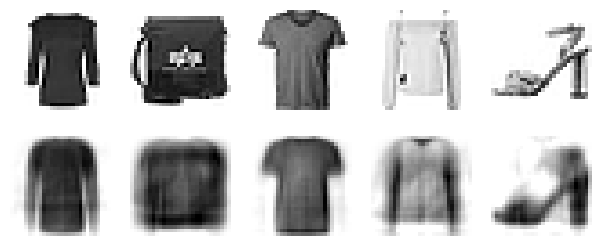

In [29]:
plot_reconstructions(sparse_l1_ae)
plt.show()

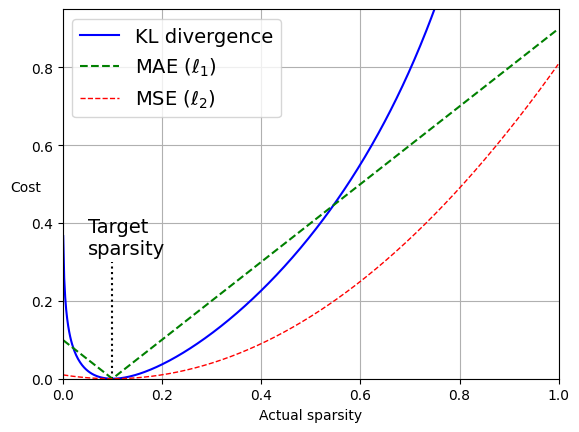

In [30]:
# extra code – this cell generates and saves Figure 17–10
p = 0.1
q = np.linspace(0.001, 0.999, 500)
kl_div = p * np.log(p / q) + (1 - p) * np.log((1 - p) / (1 - q))
mse = (p - q) ** 2
mae = np.abs(p - q)
plt.plot([p, p], [0, 0.3], "k:")
plt.text(0.05, 0.32, "Target\nsparsity", fontsize=14)
plt.plot(q, kl_div, "b-", label="KL divergence")
plt.plot(q, mae, "g--", label=r"MAE ($\ell_1$)")
plt.plot(q, mse, "r--", linewidth=1, label=r"MSE ($\ell_2$)")
plt.legend(loc="upper left", fontsize=14)
plt.xlabel("Actual sparsity")
plt.ylabel("Cost", rotation=0)
plt.axis([0, 1, 0, 0.95])
plt.grid(True)

In [31]:
kl_divergence = tf.keras.losses.kullback_leibler_divergence

class KLDivergenceRegularizer(tf.keras.regularizers.Regularizer):
  def __init__(self, weight, target):
    self.weight = weight
    self.target = target

  def __call__(self, inputs):
    mean_activities = tf.reduce_mean(inputs, axis=0)
    return self.weight * (
        kl_divergence(self.target, mean_activities) +
        kl_divergence(1. - self.target, 1. - mean_activities))

In [32]:
tf.random.set_seed(42)

kld_reg = KLDivergenceRegularizer(weight=5e-3, target=0.1)

sparse_kl_encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(300, activation='sigmoid',
                          activity_regularizer = kld_reg)
])

sparse_kl_decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(28 * 28),
    tf.keras.layers.Reshape([28, 28])
])

sparse_kl_ae = tf.keras.Sequential([sparse_kl_encoder, sparse_kl_decoder])

sparse_kl_ae.compile(loss='mse', optimizer='nadam')
history = sparse_kl_ae.fit(X_train, X_train, epochs=10,
                           validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0708 - val_loss: 0.0227
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0204 - val_loss: 0.0187
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0162 - val_loss: 0.0167
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0139 - val_loss: 0.0150
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0125 - val_loss: 0.0127
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0116 - val_loss: 0.0118
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0110 - val_loss: 0.0110
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0105 - val_loss: 0.0112
Epoch 9/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0103 - val_loss: 0.0104
Epoch 10/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0100 - val_loss: 0.0104


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


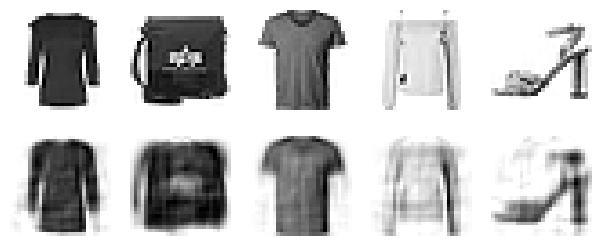

In [33]:
plot_reconstructions(sparse_kl_ae)
plt.show()

# Variational Autoencoders

In [34]:
class Sampling(tf.keras.layers.Layer):
  def call(self, inputs):
    mean, log_var = inputs
    return tf.random.normal(tf.shape(log_var)) * tf.exp(log_var / 2) + mean

In [35]:
tf.random.set_seed(42)

codings_size = 10

inputs = tf.keras.layers.Input(shape=[28, 28])
Z = tf.keras.layers.Flatten()(inputs)
Z = tf.keras.layers.Dense(150, activation='relu')(Z)
Z = tf.keras.layers.Dense(100, activation='relu')(Z)
codings_mean = tf.keras.layers.Dense(codings_size)(Z) #μ
codings_log_var = tf.keras.layers.Dense(codings_size)(Z)  #
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = tf.keras.Model(
    inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])

In [36]:
decoder_inputs = tf.keras.layers.Input(shape=[codings_size])
x = tf.keras.layers.Dense(100, activation='relu')(decoder_inputs)
x = tf.keras.layers.Dense(150, activation='relu')(x)
x = tf.keras.layers.Dense(28 * 28)(x)
outputs = tf.keras.layers.Reshape([28, 28])(x)
variational_decoder = tf.keras.Model(inputs=[decoder_inputs], outputs=[outputs])

In [37]:
_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_ae = tf.keras.Model(inputs=[inputs], outputs=[reconstructions])

In [38]:
from tensorflow.keras.layers import Layer
import tensorflow as tf

# Custom latent loss layer
class LatentLossLayer(Layer):
    def call(self, inputs):
        codings_mean, codings_log_var = inputs
        # Calculate the latent loss
        latent_loss = -0.5 * tf.reduce_sum(
            1 + codings_log_var - tf.exp(codings_log_var) - tf.square(codings_mean),
            axis=-1)
        # Add the latent loss to the model
        self.add_loss(tf.reduce_mean(latent_loss) / 784.)
        return inputs  # Pass the inputs forward as is

# Apply the custom loss layer to your model
latent_loss_layer = LatentLossLayer()([codings_mean, codings_log_var])


In [39]:
variational_ae.compile(loss='mse', optimizer='nadam')
variational_ae.fit(X_train, X_train, epochs=25, batch_size=128,
                   validation_data = (X_valid, X_valid))

Epoch 1/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.0523 - val_loss: 0.0227
Epoch 2/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0216 - val_loss: 0.0200
Epoch 3/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0193 - val_loss: 0.0186
Epoch 4/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0181 - val_loss: 0.0179
Epoch 5/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0174 - val_loss: 0.0171
Epoch 6/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0169 - val_loss: 0.0168
Epoch 7/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0165 - val_loss: 0.0167
Epoch 8/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0162 - val_loss: 0.0163
Epoch 9/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0160 - val_loss: 0.0161
Epoch 10/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0158 - val_loss: 0.0160
Epoch 11/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0156 - val_loss: 0.0158
Epoch 12/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/ste

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step


TypeError: Invalid shape (5, 28, 28) for image data

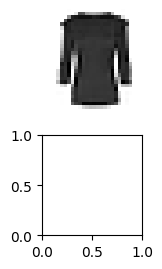

In [40]:
plot_reconstructions(variational_ae)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


(-0.5, 27.5, 27.5, -0.5)

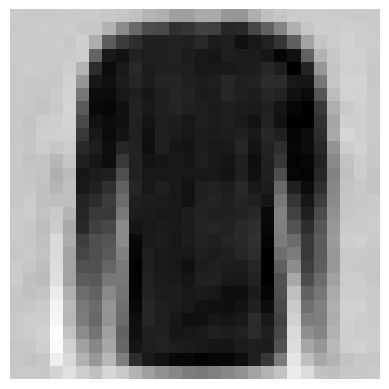

In [41]:
plt.imshow(tf.squeeze(variational_ae.predict(X_valid[:1])),cmap='binary')
plt.axis('off')

# Generative Adversial Networks

In [42]:
tf.random.set_seed(42)

codings_size = 30

generator = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
  tf.keras.layers.Dense(150, activation='relu', kernel_initializer='he_normal'),
  tf.keras.layers.Dense(28 * 28, activation='sigmoid'),
  tf.keras.layers.Reshape([28, 28]),
])

discriminator = tf.keras.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(150, activation='relu', kernel_initializer='he_normal'),
  tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
  tf.keras.layers.Dense(1, activation='sigmoid'),
])

gan = tf.keras.Sequential([generator, discriminator])

In [43]:
discriminator.compile(loss='binary_crossentropy', optimizer='rmsprop')
discriminator.trainable = False
gan.compile(loss='binary_crossentropy', optimizer='rmsprop')

In [44]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [45]:
def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = images.squeeze(axis=-1)
    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")

In [46]:
def train_gan(gan, dataset, batch_size, codings_size, n_epochs):
  generator, discriminator = gan.layers
  for epoch in range(n_epochs):
    print(f'Epoch {epoch + 1}/{n_epochs}')
    for X_batch in dataset:
      noise = tf.random.normal(shape=[batch_size, codings_size])
      generated_images = generator(noise)
      X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
      y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
      discriminator.train_on_batch(X_fake_and_real, y1)
      noise = tf.random.normal(shape=[batch_size, codings_size])
      y2 = tf.constant([[1.]] * batch_size)
      gan.train_on_batch(noise, y2)
    plot_multiple_images(generated_images.numpy(), 8)
    plt.show()

train_gan(gan, dataset, batch_size, codings_size, n_epochs=3)

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


KeyboardInterrupt: 

In [47]:
tf.random.set_seed(42)

codings = tf.random.normal(shape=[batch_size, codings_size])
generated_images = generator.predict(codings)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


# Deep Convolutional GAN

In [48]:
tf.random.set_seed(42)
codings_size = 100

generator = tf.keras.Sequential([
  tf.keras.layers.Dense(7 * 7 * 128),
  tf.keras.layers.Reshape([7, 7, 128]),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2DTranspose(64, kernel_size=5, strides=2,
                                  padding='same', activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2DTranspose(1, kernel_size=5, strides=2,
                                  padding='same', activation='tanh')
])

discriminator = tf.keras.Sequential([
  tf.keras.layers.Conv2D(64, kernel_size=5, strides=2, padding='same',
                         activation=tf.keras.layers.LeakyReLU(0.2)),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Conv2D(128, kernel_size=5, strides=2, padding='same',
                         activation=tf.keras.layers.LeakyReLU(0.2)),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

gan = tf.keras.Sequential([generator, discriminator])

In [49]:
X_train_dcgan = X_train.reshape(-1, 28, 28, 1) * 2. - 1.

# Diffusion Models

In [50]:
def variance_schedule(T, s=0.008, max_beta=0.999):
    t = np.arange(T + 1)
    f = np.cos((t / T + s) / (1 + s) * np.pi / 2) ** 2
    alpha = np.clip(f[1:] / f[:-1], 1 - max_beta, 1)
    alpha = np.append(1, alpha).astype(np.float32)  # add α₀ = 1
    beta = 1 - alpha
    alpha_cumprod = np.cumprod(alpha)
    return alpha, alpha_cumprod, beta  # αₜ , α̅ₜ , βₜ for t = 0 to T

np.random.seed(42)  # extra code – for reproducibility
T = 4000
alpha, alpha_cumprod, beta = variance_schedule(T)

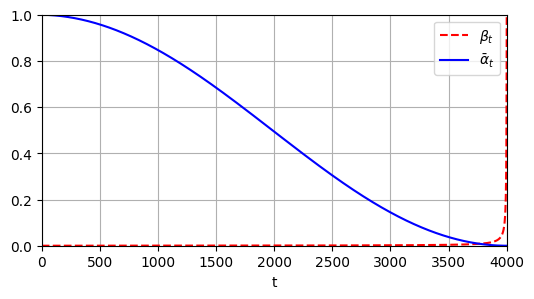

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))
plt.plot(beta, "r--", label=r"$\beta_t$")
plt.plot(alpha_cumprod, "b", label=r"$\bar{\alpha}_t$")
plt.axis([0, T, 0, 1])
plt.grid(True)
plt.xlabel(r"t")
plt.legend()
plt.show()

In [52]:
def prepare_batch(X):
  X = tf.cast(X[..., tf.newaxis], tf.float32) * 2 - 1
  X_shape = tf.shape(X)
  t = tf.random.uniform([X_shape[0]], minval=1, maxval=T + 1, dtype=tf.int32)
  alpha_cm = tf.gather(alpha_cumprod, t)
  alpha_cm = tf.reshape(alpha_cm, [X_shape[0]] + [1] * (len(X_shape) - 1))
  noise = tf.random.normal(X_shape)
  return {
      'X_noisy': alpha_cm ** 0.5 * X + (1 - alpha_cm) ** 0.5 * noise,
      'time': t,
  }, noise

In [53]:
import tensorflow as tf

def prepare_dataset(X, batch_size=32, shuffle=False):
  ds = tf.data.Dataset.from_tensor_slices(X)
  if shuffle:
    ds = ds.shuffle(10_000)
  return ds.batch(batch_size).map(prepare_batch).prefetch(1)

tf.random.set_seed(43)
train_set = prepare_dataset(X_train, batch_size=32, shuffle=True)
valid_set = prepare_dataset(X_valid, batch_size=32)

Original Images


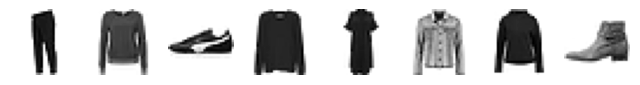

Time steps: [3405  312 3441 1991 2443 1657 3308 1151]
Noisy images


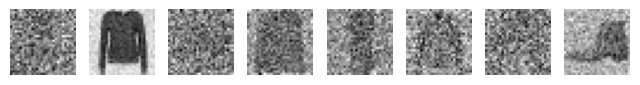

Noise to predict


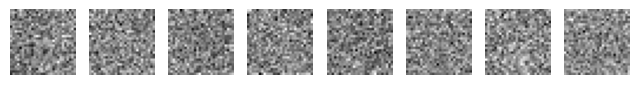

In [54]:
# extra code - just a quick sanity check

def subtract_noise(X_noisy, time, noise):
  X_shape = tf.shape(X_noisy)
  alpha_cm = tf.gather(alpha_cumprod, time)
  alpha_cm = tf.reshape(alpha_cm, [X_shape[0]] + [1] * (len(X_shape) - 1))
  return (X_noisy - (1 - alpha_cm) ** 0.5 * noise) / alpha_cm ** 0.5

X_dict, Y_noise = list(train_set.take(1))[0] # get the first batch
X_original = subtract_noise(X_dict['X_noisy'], X_dict['time'], Y_noise)

print('Original Images')
plot_multiple_images(X_original[:8].numpy())
plt.show()
print('Time steps:', X_dict['time'].numpy()[:8])
print('Noisy images')
plot_multiple_images(X_dict['X_noisy'][:8].numpy())
plt.show()
print('Noise to predict')
plot_multiple_images(Y_noise[:8].numpy())
plt.show()

In [55]:
embed_size = 64

class TimeEncoding(tf.keras.layers.Layer):
  def __init__(self, T, embed_size, dtype=tf.float32, **kwargs):
    super().__init__(dtype=dtype, **kwargs)
    assert embed_size % 2 == 0, 'embed_size must be even'
    p, i = np.meshgrid(np.arange(T + 1), 2 * np.arange(embed_size // 2))
    t_emb = np.empty((T + 1, embed_size))
    t_emb[:, ::2] = np.sin(p / 10_000 ** (i / embed_size)).T
    t_emb[:, 1::2] = np.cos(p / 10_000 ** (i / embed_size)).T
    self.time_encodings = tf.constant(t_emb.astype(self.dtype))

  def call(self, inputs):
    return tf.gather(self.time_encodings, inputs)

In [56]:
def build_diffusion_model():
  X_noisy = tf.keras.layers.Input(shape=[28, 28, 1], name='X_noisy')
  time_input = tf.keras.layers.Input(shape=[], dtype=tf.int32, name='time')
  time_enc = TimeEncoding(T, embed_size)(time_input)

  dim = 16
  Z = tf.keras.layers.ZeroPadding2D((3, 3))(X_noisy)
  Z = tf.keras.layers.Conv2D(dim, 3)(Z)
  Z = tf.keras.layers.BatchNormalization()(Z)
  Z = tf.keras.layers.Activation('relu')(Z)

  time = tf.keras.layers.Dense(dim)(time_enc) # adatpt time encoding
  Z = time[:, tf.newaxis, tf.newaxis, :] + Z  # add time data to every pixel

  skip = Z
  cross_skips = []  # skip connections across the down and up parts of the UNet

  for dim in (32, 64, 128):
    Z = tf.keras.layers.Activation('relu')(Z)
    Z = tf.keras.layers.SeparableConv2D(dim, 3, padding='same')(Z)
    Z = tf.keras.layers.BatchNormalization()(Z)

    Z = tf.keras.layers.Activation('relu')(Z)
    Z = tf.keras.layers.SeparableConv2D(dim, 3, padding='same')(Z)
    Z = tf.keras.layers.BatchNormalization()(Z)

    cross_skips.append(Z)
    Z = tf.keras.layers.MaxPooling2D(3, strides=2, padding='same')(Z)
    skip_link = tf.keras.layers.Conv2D(dim, 1, strides=2,
                                       padding='same')(skip)
    Z = tf.keras.layers.add([Z, skip_link])

    time = tf.keras.layers.Dense(dim)(time_enc)
    Z = time[:, tf.newaxis, tf.newaxis, :] + Z
    skip = Z

  for dim in (64, 32, 16):
    Z = tf.keras.layers.Activation('relu')(Z)
    Z = tf.keras.layers.Conv2DTranspose(dim, 3, padding='same')(Z)
    Z = tf.keras.layers.BatchNormalization()(Z)

    Z = tf.keras.layers.Activation('relu')(Z)
    Z = tf.keras.layers.Conv2DTranspose(dim, 3, padding='same')(Z)
    Z = tf.keras.layers.BatchNormalization()(Z)

    Z = tf.keras.layers.UpSampling2D(2)(Z)

    skip_link = tf.keras.layers.UpSampling2D(2)(skip)
    skip_link = tf.keras.layers.Conv2D(dim, 1, padding='same')(skip_link)
    Z = tf.keras.layers.add([Z, skip_link])

    time = tf.keras.layers.Dense(dim)(time_enc)
    Z = time[:, tf.newaxis, tf.newaxis, :] + Z
    Z = tf.keras.layers.concatenate([Z, cross_skips.pop()], axis=-1)
    skip = Z

  outputs = tf.keras.layers.Conv2D(1, 3, padding='same')(Z)[:, 2:-2, 2:-2]
  return tf.keras.Model(inputs=[X_noisy, time_input], outputs=[outputs])


In [ ]:
tf.random.set_seed(42)
model = build_diffusion_model()
model.compile(loss=tf.keras.losses.Huber(), optimizer='nadam')

# extra code - adds a ModelCheckpoint callback
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('my_diffusion_model.keras',
                                                   save_best_only=True)

history = model.fit(train_set, validation_data=valid_set, epochs=100,
                    callbacks=[checkpoint_cb])

Epoch 1/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 64s 19ms/step - loss: 0.1772 - val_loss: 0.0680
Epoch 2/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 0.0639 - val_loss: 0.0542
Epoch 3/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 0.0537 - val_loss: 0.0517
Epoch 4/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 0.0495 - val_loss: 0.0477
Epoch 5/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - loss: 0.0472 - val_loss: 0.0508
Epoch 6/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - loss: 0.0453 - val_loss: 0.0438
Epoch 7/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 0.0442 - val_loss: 0.0462
Epoch 8/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 0.0435 - val_loss: 0.0426
Epoch 9/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - loss: 0.0430 - val_loss: 0.0436
Epoch 10/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - loss: 0.0424 - val_loss: 0.0418
Epoch 11/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 0.0421 - val_loss: 0.04

In [ ]:
def generate(model, batch_size=32):
  X = tf.random.normal([batch_size, 28, 28, 1])
  for t in range(T - 1, 0, -1):
    print(f'\rt = {t}', end=' ')
    noise = (tf.random.normal if t > 1 else tf.zeros)(tf.shape(X))
    X_noise = model({'X_noisy': X, 'time': tf.constant([t] * batch_size)})
    X = (
        1 / alpha[t] ** 0.5
        * (X - beta[t] / (1 - alpha_cumprod[t]) ** 0.5 * X_noise)
        + (1 - alpha[t]) ** 0.5 * noise
    )

    return X

tf.random.set_seed(42)
X_gen = generate(model)

In [ ]:
plot_multiple_images(X_gen.numpy(), 8)
plt.show()